<a href="https://colab.research.google.com/github/CleberYoo/AI_Drills_2023ver/blob/main/gaussian%26canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [37]:
image_MJ = cv2.imread('/content/210616193554-01-michael-jordan-athlete-activism.jpg.webp')

$$
G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
$$

In [68]:
np.arange(-5, 5)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [67]:
array = np.arange((11//2)*(-1), (11//2)+1)
print(array)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [69]:
# size : 커널 크기       sigma : 표준편차 (sigma^2 : 분산)
def Gaussian(size, sigma):
    #중심에서부터의 거리 계산
    array = np.arange((size//2)*(-1), (size//2)+1)

    #x^2+y^2 배열 초기화
    xx_yy_array = np.zeros((size, size))

    for x in range(size):
        for y in range(size):
            #중심에서부터의 거리를 제곱합으로 계산
            xx_yy_array[x,y] = array[x]**2+array[y]**2

    # 필터 초기화
    filter = np.zeros((size, size))

    for x in range(size):
        for y in range(size):
             # 수학적 수식 구현부
             filter[x,y] = 1 / (2 * np.pi * sigma**2) * np.exp(-xx_yy_array[x,y]/(2 * sigma**2))

    # Scaling
    filter /= filter.sum()

    return filter

In [71]:
# 11X11 크기의 가우시안 필터 객체 생성
gaussian_11X11 = Gaussian(11, 5)

In [72]:
# 컨볼루션
gaussian_MJ = cv2.filter2D(image_MJ, -1, gaussian_11X11)

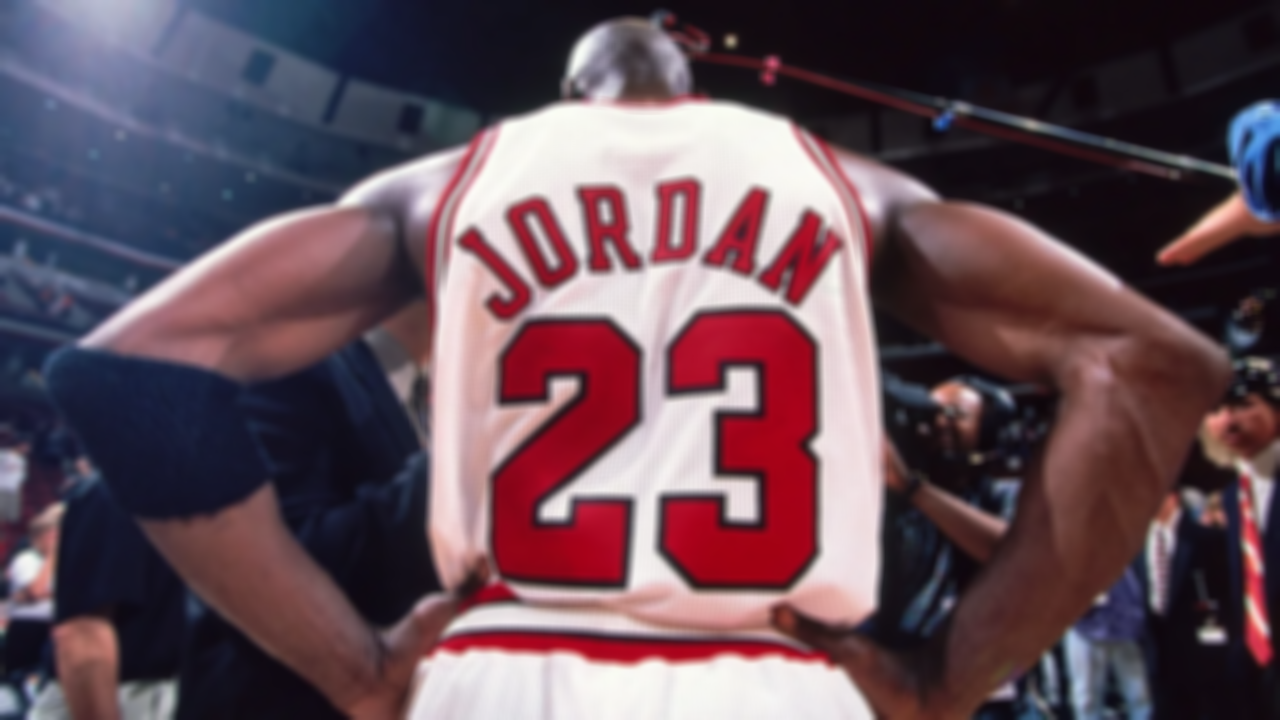

True

In [74]:
cv2_imshow(gaussian_MJ)
cv2.imwrite('/content/gaussian_MJ.png', gaussian_MJ)

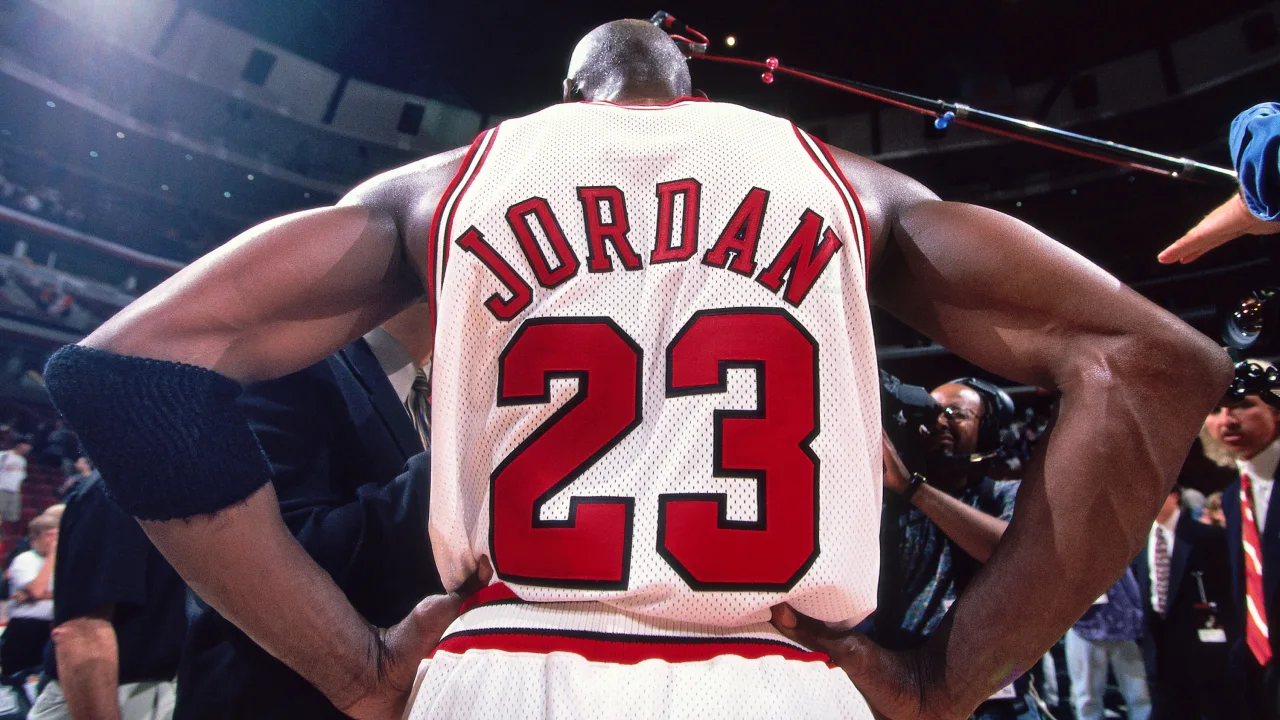

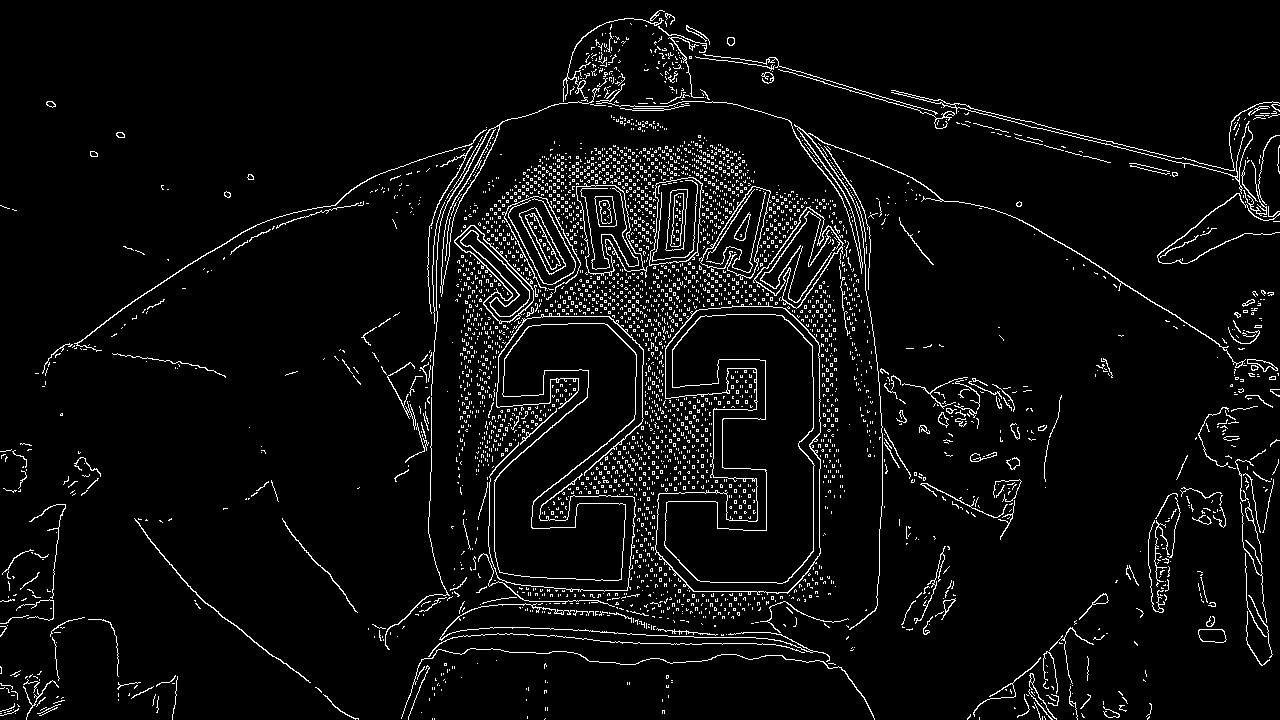

-1

In [26]:
canny2 = cv2.Canny(image_board, 192, 224)    # OpenCV 캐니 에지

cv2_imshow(image_board)
cv2.imwrite('/content/MJ.png', image_board)
#cv2.imshow("canny", canny)                 # 사용자 정의 캐니
cv2_imshow(canny2)           # OpenCV 캐니 에지
cv2.imwrite('/content/MJ_after_canny.png', canny2)
cv2.waitKey(0)